In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from PIL import Image 

In [2]:
#Defining the number of bits to be used and number of colors to be used
#n_bits = 4, 8, 12
n_bits = int(input("Enter the number of bits to be used (4, 8, 12): "))
n_colors = 2**n_bits

Enter the number of bits to be used (4, 8, 12): 4


In [3]:
# Loading the image
image_name = input("Enter the name of the image to be Quantized: ")
image = Image.open(image_name)

Enter the name of the image to be Quantized: Indoor.jpg


In [4]:
# Convert to floats instead of the default 8 bits integer coding. 
# Dividing by 255 is important so that plt.imshow behaves works well on float data (need to be in the range [0-1])
image = np.array(image, dtype=np.float64)/255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(image.shape)
image_array = np.reshape(image, (w * h, 3))

In [5]:
print("---------- Fitting model ----------")
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array)

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
labels = kmeans.predict(image_array)

---------- Fitting model ----------
Predicting color indices on the full image (k-means)


In [6]:
# Recreate the (compressed) image from the code book & labels
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

In [13]:
kmeans.cluster_centers_

array([[0.58825941, 0.40552151, 0.27330148],
       [0.72082246, 0.69197447, 0.66012571],
       [0.30825965, 0.26950553, 0.22492618],
       [0.57226819, 0.53275326, 0.51013481],
       [0.75868721, 0.73798781, 0.71377821],
       [0.80268746, 0.69905632, 0.24119883],
       [0.05225487, 0.31411629, 0.65198797],
       [0.47412371, 0.44829162, 0.43741813],
       [0.6584676 , 0.62125185, 0.59165653],
       [0.81972774, 0.82136291, 0.83386841],
       [0.13707328, 0.11177452, 0.08695134],
       [0.22543229, 0.18313983, 0.15149711],
       [0.50700343, 0.1773512 , 0.19824294],
       [0.52268325, 0.62303913, 0.73819978],
       [0.39891186, 0.36038528, 0.33484941],
       [0.79234188, 0.77741057, 0.75764695]])

Quantized image (16 colors, K-Means)


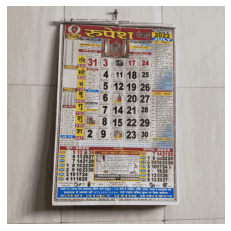

In [10]:
# Displaying and Saving the Quantized image
plt.axis("off")
print(f"Quantized image ({n_colors} colors, K-Means)")
plt.imsave("qti2.jpg", recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))